# Data exploration

## Imports

In [2]:
import pandas as pd
import seaborn

RAW_DATA_PATH = '../../data/medical-nlp/mtsamples.csv'

seaborn.set()

## Data retrieval

In [3]:
df = pd.read_csv(RAW_DATA_PATH)
df.head()

,Unnamed: 0,description,medical_specialty,sample_name,transcription,keywords
0,0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr...","allergy / immunology, allergic rhinitis, aller..."
1,1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh..."
2,2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...","bariatrics, laparoscopic gastric bypass, heart..."
3,3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple..."
4,4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo..."


In [61]:
df.describe()

,Unnamed: 0
count,4999.000000
mean,2499.000000
std,1443.231328
min,0.000000
25%,1249.500000
50%,2499.000000
75%,3748.500000
max,4998.000000


## Missing data

In [4]:
df.isnull().sum(axis = 0)

Unnamed: 0              0
description             0
medical_specialty       0
sample_name             0
transcription          33
keywords             1068
dtype: int64

In [5]:
df['transcription'].fillna(df['description'], inplace=True)

## Exploration

In [6]:
df['medical_specialty'].unique()

array([' Allergy / Immunology', ' Bariatrics',
       ' Cardiovascular / Pulmonary', ' Neurology', ' Dentistry',
       ' Urology', ' General Medicine', ' Surgery', ' Speech - Language',
       ' SOAP / Chart / Progress Notes', ' Sleep Medicine',
       ' Rheumatology', ' Radiology', ' Psychiatry / Psychology',
       ' Podiatry', ' Physical Medicine - Rehab',
       ' Pediatrics - Neonatal', ' Pain Management', ' Orthopedic',
       ' Ophthalmology', ' Office Notes', ' Obstetrics / Gynecology',
       ' Neurosurgery', ' Nephrology', ' Letters',
       ' Lab Medicine - Pathology', ' IME-QME-Work Comp etc.',
       ' Hospice - Palliative Care', ' Hematology - Oncology',
       ' Gastroenterology', ' ENT - Otolaryngology', ' Endocrinology',
       ' Emergency Room Reports', ' Discharge Summary',
       ' Diets and Nutritions', ' Dermatology',
       ' Cosmetic / Plastic Surgery', ' Consult - History and Phy.',
       ' Chiropractic', ' Autopsy'], dtype=object)

<Axes: >

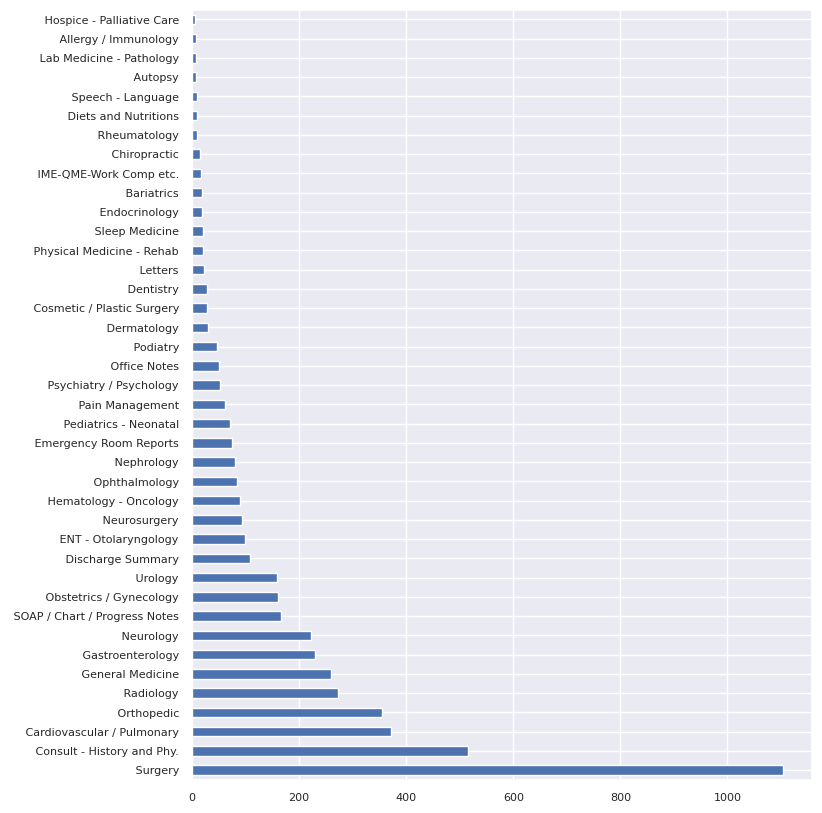

In [16]:
df['medical_specialty'].value_counts().plot(kind='barh', figsize=(8,10),fontsize=8)

## Data selection

In [65]:
for idx, row in df.iterrows():
    filename = (row['medical_specialty']
        .replace('/','-')
        .replace(' - ','-')
        .strip()
        .replace(' ','-')
    )
    with open(f'dataset/medical-nlp-specialty-transcriptions/{filename}.txt','a') as f:
        f.write(row['transcription']+'\n')

In [23]:
top_8 = df['medical_specialty'].value_counts()[:8]
top_8

 Surgery                       1103
 Consult - History and Phy.     516
 Cardiovascular / Pulmonary     372
 Orthopedic                     355
 Radiology                      273
 General Medicine               259
 Gastroenterology               230
 Neurology                      223
Name: medical_specialty, dtype: int64

<Axes: >

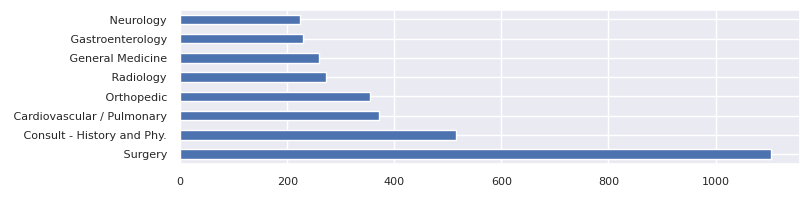

In [32]:
df_filter = df[df['medical_specialty'].isin(top_8.index.to_list())]
df_filter['medical_specialty'].value_counts().plot(kind='barh', figsize=(8,2),fontsize=8)

In [60]:
def contains_text(row):
    text = 'smok'
    return text in row['transcription']
    
result = df.apply(contains_text, axis='columns')

with open('smok.txt','w') as f:
    for idx, row in df[result==True].iterrows():
        f.write(f'{row["transcription"]}\n')
